---
<h1 style="text-align: center;">Projeto AMG:</h1>
<h2 style="text-align: center;">Análise de Qualidade de Vinhos</h2>

*Discentes:*

    *   Gabriel D'assumpção de Carvalho
    *   Arthur Bezerra Calado
    *
    *

*Date:* 08/05/2024

---
---

# Introdução

O seguinte relatório vai estar utilizando a ([base de dados de vinho](https://archive.ics.uci.edu/dataset/186/wine+quality)), a qual é multivariada e contém diversas variáveis que descrevem as características físico-químicas de vinhos brancos e tintos, bem como sua qualidade atribuída por especialistas. As variáveis incluem medidas como acidez fixa, acidez volátil, teor alcoólico, entre outras.

| **Nome da variável**       | **Papel**          | **Tipo**       | **Descrição**                 | **Valores ausentes** |
|------------------------|----------------|------------|---------------------------|------------------|
| acidez fixa          | Característica | Contínuo   |                           | Não              |
| acidez volátil       | Característica | Contínuo   |                           | Não              |
| ácido cítrico            | Característica | Contínuo   |                           | Não              |
| açúcar residual         | Característica | Contínuo   |                           | Não              |
| Cloretos               | Característica | Contínuo   |                           | Não              |
| Dióxido de enxofre livre    | Característica | Contínuo   |                           | Não              |
| Dióxido de enxofre total   | Característica | Contínuo   |                           | Não              |
| densidade              | Característica | Contínuo   |                           | Não              |
| ph                     | Característica | Contínuo   |                           | Não              |
| Sulfatos               | Característica | Contínuo   |                           | Não              |
| álcool                 | Característica | Contínuo   |                           | Não              |
| qualidade              | Alvo           | Categórico    | escore entre 0 e 10       | Não              |
| Cor                    | Característica          | Categórico | vermelho ou branco        | Não              |


A primeira parte deste relatório consistirá em uma análise exploratória dos dados, com o objetivo de compreender melhor as 13 variáveis. Serão apresentados detalhes como mínimo, máximo, média, mediana, variância, possíveis outliers, assimetria/simetria e a distribuição de probabilidade de cada variável.

Em seguida, avançaremos para a construção de quatro modelos de machine learning, utilizando as seguintes técnicas:

1) Arvores de decisão;
2) Bayesiano ingenuo;
3) Regressão logistica;
4) k-vizinhos.
  
A variável **qualidade** será utilizada como a variável resposta/dependente (y), fornecendo dados sobre a qualidade do vinho, variando de 0 (menor nota) a 10 (maior nota).

# Análise Exploratória

## Biblioteca utilizadas:

1) Pandas -> manipulação de dados;
2) numpy -> cálculos estatísticos;
3) plotly -> gráficos interrativos;
4) matplotlib -> gráficos;
5) scipy -> transformação de variável.

In [3]:
# Instalação das bibliotecas

# %pip install pandas

# %pip install ucimlrepo

# %pip install numpy

# %pip install scipy

# %pip install matplotlib

In [2]:
# Importação das bibliotecas
import pandas as pd

import numpy as np

from scipy import stats

import matplotlib.pyplot as plt

In [4]:
# Importando os dados
df = pd.read_csv("https://raw.githubusercontent.com/gabrieldadcarvalho/machine_learning/main/wine_quality/winequality-white.csv", sep=";")

In [5]:
# Obtendo as variáveis independentes e dependente
x = df.iloc[:, :11]
y = df.iloc[:, -1]  # Qualidade vinho

In [6]:
# Verificando as 5 primeiras linhas de x e y
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [7]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

## Variáveis Explicativas
Vamos realizar uma análise exploratória das variáveis explicativas do conjunto de dados. Abaixo estão as estatísticas descritivas e visualizações para cada variável.

In [8]:
pd.options.display.float_format = "{:.4f}".format
x.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000,4898.0000
mean,6.8548,0.2782,0.3342,6.3914,0.0458,35.3081,138.3607,0.9940,3.1883,0.4898,10.5143
std,0.8439,0.1008,0.1210,5.0721,0.0218,17.0071,42.4981,0.0030,0.1510,0.1141,1.2306
min,3.8000,0.0800,0.0000,0.6000,0.0090,2.0000,9.0000,0.9871,2.7200,0.2200,8.0000
25%,6.3000,0.2100,0.2700,1.7000,0.0360,23.0000,108.0000,0.9917,3.0900,0.4100,9.5000
50%,6.8000,0.2600,0.3200,5.2000,0.0430,34.0000,134.0000,0.9937,3.1800,0.4700,10.4000
75%,7.3000,0.3200,0.3900,9.9000,0.0500,46.0000,167.0000,0.9961,3.2800,0.5500,11.4000
max,14.2000,1.1000,1.6600,65.8000,0.3460,289.0000,440.0000,1.0390,3.8200,1.0800,14.2000


### Dados faltantes

Como pode ser visto na descrição das variáveis explicativas, todas elas possuem 4898 observações, portanto nenhuma possui dados faltantes.

### Acidez Fixa

Ao analisarmos a variável que contém os dados da acidez fixa, podemos verificar que a maioria dos vinhos tem uma acidez próxima de 6.85, variando entre 3.8 e 14.2. Além disso, o desvio padrão é de 0.84, indicando que a grande maioria dos vinhos tem acidez entre 6.01 e 7.69.

Além disso, o segundo quartil, também conhecido como mediana, está em 6.8, próximo à media. Com base nesses dados, é provável que a distribuição dessa variável seja quase simétrica.

Para verificar a questão da sua destribuição e possíveis outlires vamos utilizar gráfico de histograma e box-plot.

In [9]:
# Calculando a moda da acidez fixa
moda_acid_f = x["fixed acidity"].mode()
moda_acid_f

0   6.8000
Name: fixed acidity, dtype: float64

Podemos observar que a maioria dos vinhos possui uma quantidade de acidez fixa em torno de 6.8. Essa tendência é confirmada pelo pico no histograma abaixo.

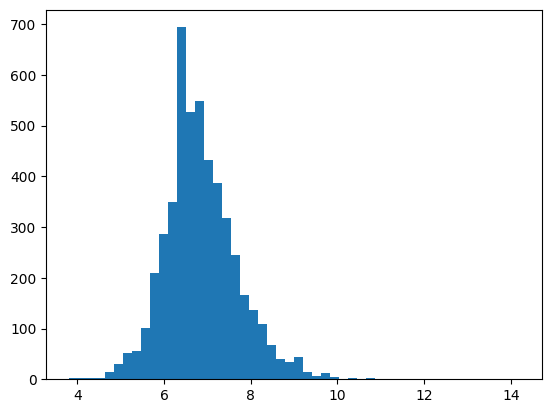

In [57]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.hist(x["fixed acidity"], bins=50)
plt.show()

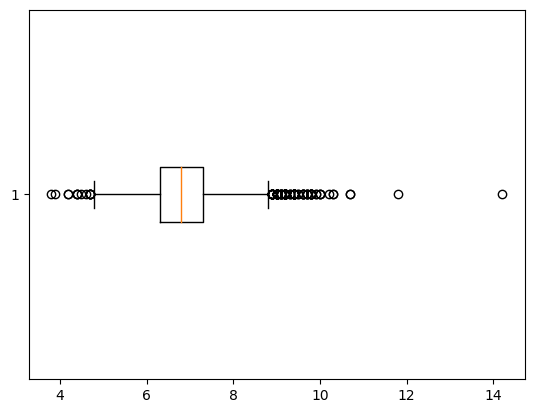

In [58]:
# Criação do grafico box-plot para a variável 'fixed acidity'
plt.boxplot(x["fixed acidity"], vert=False)
plt.show()

A análise do histograma e do boxplot revela que a variável ‘acidez fixa’ apresenta uma distribuição uniforme. No entanto, a centralização do histograma é afetada por duas observações que se distanciam significativamente do restante dos dados. Além disso, a inspeção do boxplot indica a existência de 24 possíveis outliers.

Diversas transformações foram propostas para lidar com esses outliers na variável ‘acidez fixa’, incluindo a aplicação de funções como raiz quadrada, raiz cúbica, logarítmica, exponencial, potencialização e a transformação Box-Cox. Infelizmente, nenhuma dessas transformações conseguiu ajustar os dados de maneira a eliminar os outliers.

Após a implementação dos modelos propostos, iremos avaliar se a remoção dessas observações atípicas resulta em um ajuste mais eficaz do modelo.

### Acidez Volátil
Ao verificar as estatística da acidez volátil, é possível dizer que os vinhos tem uma acidez volátil em torno de 0.278, variando entre 0.08 e 1.1. Entretando, o seu desvio padrão é de 0.1, indicando que a grande parte dos vinhos tem essa acidez entre 6.01 e 7.69.

Ainda podemos ver que metade dos vinhos tem uma acidez vólatil abaixo de 0.26 e a outra metade acima. Tendo essas analises, é bem provável que essa variável tenha uma distribuição parecida com a acidez fixa.

In [12]:
x["volatile acidity"].describe()

count   4898.0000
mean       0.2782
std        0.1008
min        0.0800
25%        0.2100
50%        0.2600
75%        0.3200
max        1.1000
Name: volatile acidity, dtype: float64

In [13]:
# Calculando a moda da acidez fixa
moda_acid_v = x["volatile acidity"].mode()
moda_acid_v

0   0.2800
Name: volatile acidity, dtype: float64

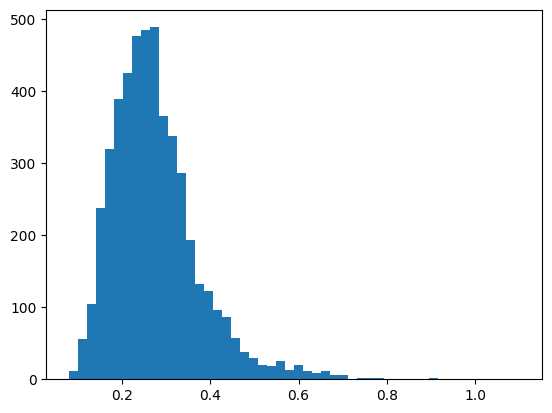

In [59]:
# Criação do grafico histograma para a variável 'fixed acidity'
plt.hist(x["volatile acidity"], bins=50)
plt.show()

Observando o gráfico de histograma da variável de acidez volátil, podemos ver que essa varíavel possui uma assimetria positiva nos seus dados, afim de melhorar isso podemos propor uma transformação logarítimica para tentar corrigir essa assimetria possitiva.

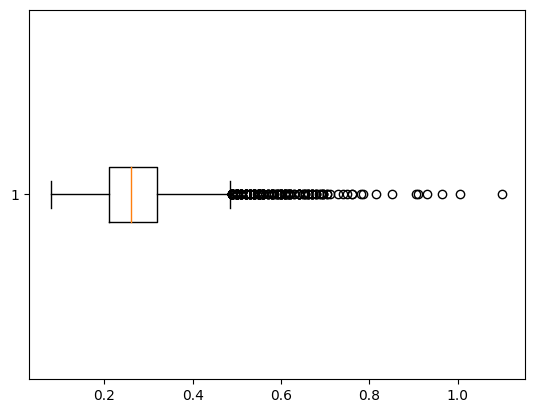

In [60]:
# Criação do grafico box-plot para a variável 'fixed acidity'
plt.boxplot(x["volatile acidity"], vert=False)
plt.show()

Observando o histograma da variável de acidez volátil, notamos uma assimetria positiva nos dados, o que é confirmado pelo gráfico de boxplot que apresenta 46 possíveis outliers.

### Ácido Cítrico

In [20]:
x["citric acid"].describe()

count   4898.0000
mean       0.3342
std        0.1210
min        0.0000
25%        0.2700
50%        0.3200
75%        0.3900
max        1.6600
Name: citric acid, dtype: float64

Ao analisarmos a descrição da variável de ácido cítrico, observamos que seus valores variam entre 0 e 1.66. A média dessa variável é de aproximadamente 0.334, com um desvio padrão de cerca de 0.121, o que sugere que a maioria dos dados está concentrada no intervalo entre 0.213 e 0.455. Além disso, a mediana é de 0.32, o que indica que está próxima da média. Vale ressaltar também que a distância do 1º quartil à mediana é menor do que a do 3º quartil, o que sugere uma assimetria positiva dos dados, com uma concentração maior de observações à esquerda.

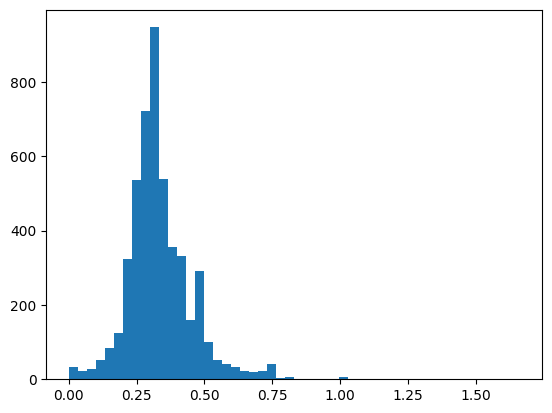

In [68]:
plt.hist(x["citric acid"], bins=50)
plt.show()

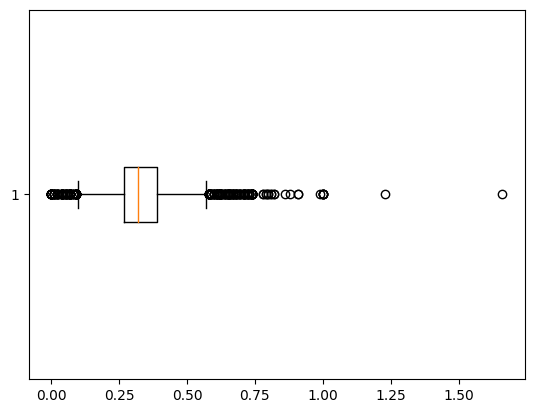

In [69]:
plt.boxplot(x["citric acid"], vert=False)
plt.show()

Além de observarmos a assimetria positiva dos dados, podemos identificar os 38 possíveis outliers no gráfico de boxplot.

### Transformação nas variáveis de acidez

Como vimos nos 3 tôpicos acima, as variáveis de acidez possui alguns anomalias nas suas distribuição, contendo muitos outliers que distorcem a sua distribuição. Afim de melhorar isso, foi proposto uma transformação para criar uma nova variável **(total acidity)**. Essa transformação consiste na seguinte combinação:

    x['total_acidity'] = (log(x["fixed acidity"] * x["volatile acidity"] + x["citric acid"])) ** (1/1.5)


In [73]:
# Criação da nova variável
x['total_acidity'] = np.log(x["fixed acidity"] * x["volatile acidity"] + x["citric acid"]) ** (1/1.5)

In [24]:
# Estatística da nova variável
x['total_acidity'].describe()

count   4869.0000
mean       0.8199
std        0.2229
min        0.0159
25%        0.6869
50%        0.8258
75%        0.9622
max        1.7639
Name: total_acidity, dtype: float64

Podemos avaliar as estatísticas descritivas da nova variável para determinar a simetria dos dados. Quando a média se aproxima da mediana e os valores do primeiro e terceiro quartis estão próximos da média mais ou menos um desvio padrão, isso sugere uma distribuição simétrica dos dados. Essa proximidade entre a média e a mediana, juntamente com a distribuição equilibrada em torno dos quartis, indica uma disposição uniforme dos dados ao redor da medida central. Essa simetria é um indicativo valioso, pois sugere que os dados não são excessivamente influenciados por valores extremos e estão distribuídos de maneira mais uniforme.

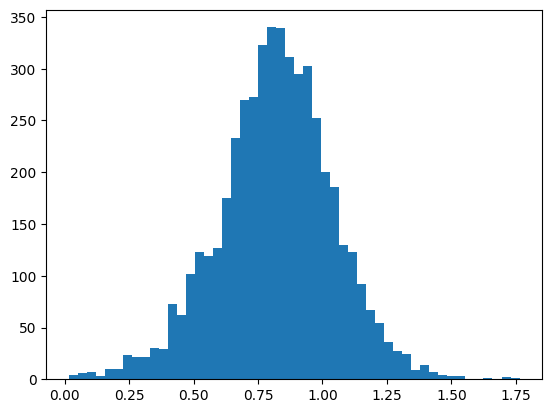

In [71]:
# Histograma total_acidity
plt.hist(x['total_acidity'], bins=50)
plt.show()

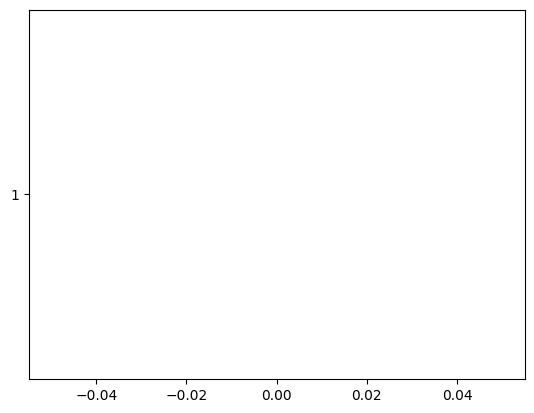

In [82]:
# Box-Plot total_acidity
plt.boxplot(x['total_acidity'], vert=False)
plt.show()

Podemos observar que a assimetria nos dados dessa nova variável apresenta uma distribuição mais simétrica. Esse resultado fortalece nossas expectativas e nos fornece uma base sólida para ajustar os modelos de aprendizado de máquina no futuro. Uma distribuição mais simétrica sugere uma representação mais equilibrada dos dados, o que é fundamental para garantir a eficácia e a robustez dos modelos que serão aplicados.

### Açucar Residual

In [27]:
x['residual sugar'].describe()

count   4898.0000
mean       6.3914
std        5.0721
min        0.6000
25%        1.7000
50%        5.2000
75%        9.9000
max       65.8000
Name: residual sugar, dtype: float64

In [28]:
x['residual sugar'].mode()

0   1.2000
Name: residual sugar, dtype: float64

Ao analisar as medidas da variável de açúcar residual, observamos que a média é de aproximadamente 6.40, com um desvio padrão considerável de 5.07. Isso sugere que a maioria dos dados está concentrada em torno do intervalo de 1.32 a 11.46.

Além disso, notamos que a moda da variável é de 1.2, o que é menor do que a mediana e a média. Essa diferença sugere uma assimetria positiva na distribuição dos dados, indicando que há uma maior concentração de valores abaixo da média, puxando a cauda da distribuição para a direita.

Também notamos a presença de uma observação bastante elevada de 65.8. Isso sugere a possibilidade de um erro na coleta dos dados ou de uma observação anômala significativa, o que pode afetar negativamente a análise descritiva. Essa observação atípica tende a aumentar significativamente tanto o desvio padrão quanto a média dos dados, distorcendo a compreensão da distribuição geral.

Para uma melhor visualização e compreensão desse outlier, será apresentado um gráfico de box-plot.

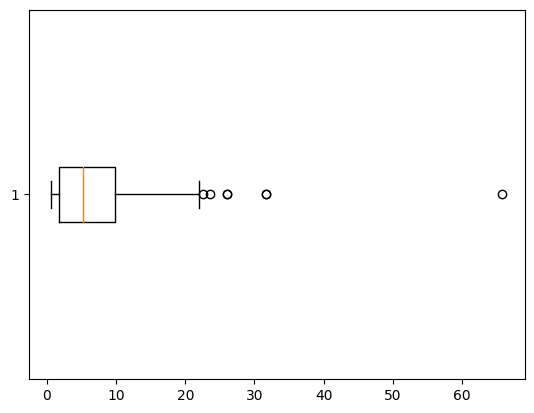

In [83]:
plt.boxplot(x['residual sugar'], vert=False)
plt.show()

Podemos observar que a observação com um valor de açúcar residual de 65 é extremamente atípica em comparação com o restante dos dados. Diante disso, podemos propor a remoção dessa observação para avaliar seu impacto nas estatísticas descritivas. Essa abordagem nos permitirá entender melhor como essa observação influencia as medidas de tendência central e dispersão dos dados, ajudando a garantir uma análise mais precisa e confiável.

In [30]:
# Removendo outlier
loc_out = x[x['residual sugar']==65.8]
x_n = x.drop(loc_out.index[0])

In [31]:
x['residual sugar'].describe()

count   4898.0000
mean       6.3914
std        5.0721
min        0.6000
25%        1.7000
50%        5.2000
75%        9.9000
max       65.8000
Name: residual sugar, dtype: float64

In [32]:
x_n['residual sugar'].describe()

count   4897.0000
mean       6.3793
std        5.0010
min        0.6000
25%        1.7000
50%        5.2000
75%        9.9000
max       31.6000
Name: residual sugar, dtype: float64

Após verificar a descrição da variável, constatamos que a remoção do outlier não trouxe uma melhora significativa nos resultados. Portanto, decidimos voltar à modelagem sem a remoção do outlier. Esta decisão é baseada na análise das estatísticas descritivas e nos objetivos específicos do projeto. Continuaremos a modelagem considerando todos os dados disponíveis, mantendo assim a integridade do conjunto de dados original e garantindo uma análise abrangente e robusta.

Para uma melhor analise desta variável, vamos verificar o seu histograma, mas já é possível identificar a sua assimetria no boxplot acima.

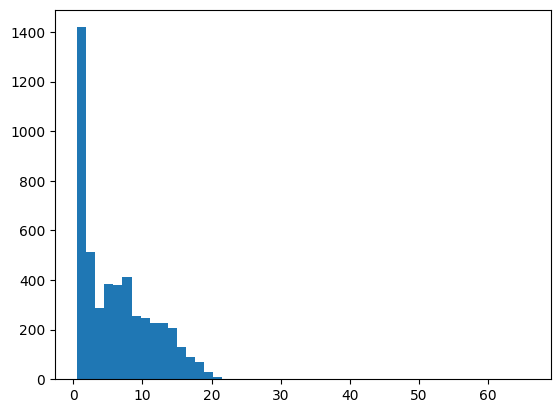

In [86]:
plt.hist(x['residual sugar'], bins=50)
plt.show()

Conforme ilustrado no histograma, a distribuição da variável de açúcar residual exibe características peculiares, com uma notável assimetria à esquerda e uma concentração significativa de dados entre os valores de 1 e 2. Para melhorar essa distribuição vai ser proposto uma transformação nessa variável.

#### Transformação da tangente seguida do log do quadrado

Para aprimorar a distribuição da variável ‘açúcar residual’, propõe-se uma transformação que combina a tangente do valor com o logaritmo do quadrado. Essa abordagem oferece uma alternativa para normalizar os dados e otimizar sua distribuição.

      
      x['tql_residual_sugar'] = np.log(np.tan((x['residual sugar']))**2

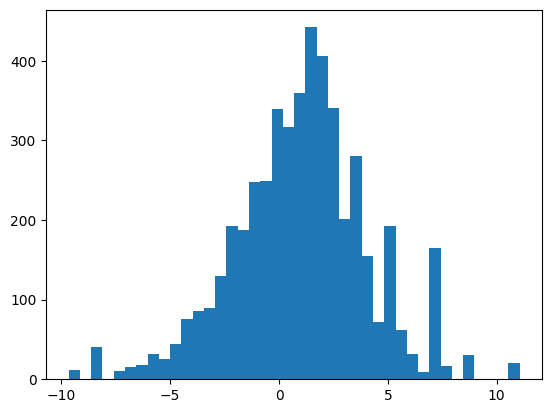

In [89]:

plt.hist(np.log(np.tan((x['residual sugar']))**2), bins=40)
plt.show()

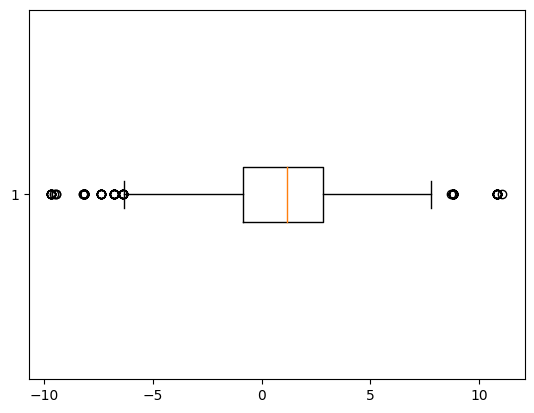

In [90]:
plt.boxplot(x=(np.log(np.tan((x['residual sugar']))**2)), vert=False)
plt.show()

Como evidenciado pelo histograma e pelo boxplot, a distribuição da nova variável transformada demonstra uma melhoria significativa na simetria, assemelhando-se mais à distribuição normal. Isso facilitará o ajuste do nosso modelo. É importante salientar que os modelos serão ajustados tanto para as variáveis transformadas quanto para as originais. Isso nos permitirá comparar e verificar se há uma melhoria no desempenho dos algoritmos.

### Cloretos

In [36]:
x['chlorides'].describe()

count   4898.0000
mean       0.0458
std        0.0218
min        0.0090
25%        0.0360
50%        0.0430
75%        0.0500
max        0.3460
Name: chlorides, dtype: float64

In [37]:
x['chlorides'].mode()

0   0.0440
Name: chlorides, dtype: float64

Ao analisar as estatísticas da variável que mostra a quantidade de cloretos no vinho, observamos que a média é aproximadamente 0.0458, com um desvio padrão de 0.0218. Isso indica que muitos vinhos estão no intervalo de aproximadamente 0.024 a 0.0676.

Além disso, a mediana (0.0430) está próxima da média (0.0458) e do 1º quartil (0.0360), sugerindo uma baixa assimetria nos dados. No entanto, existe uma observação com valor de 0.3460, que está bem distante dos três quartis, representando um valor atípico significativo.

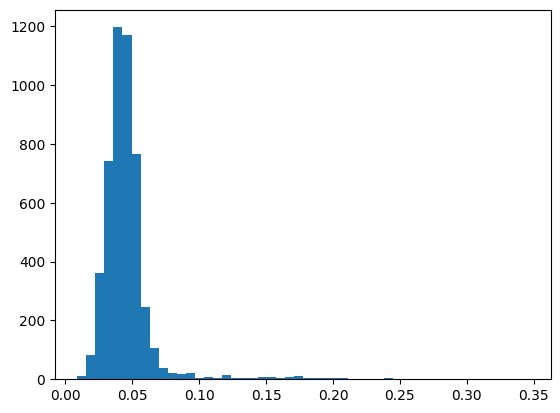

In [94]:
plt.hist(x['chlorides'], bins=50)
plt.show()

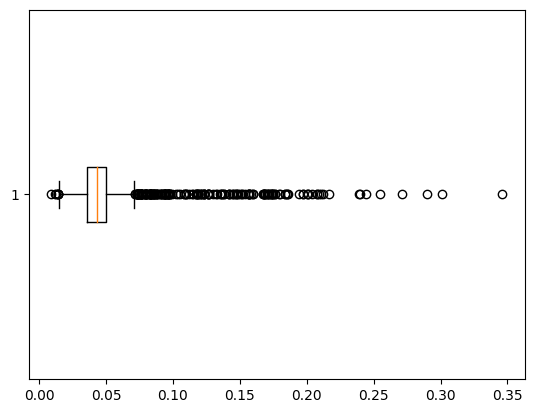

In [96]:
plt.boxplot(x['chlorides'], vert=False)
plt.show()

Ao verificar o histograma e o boxplot, observamos que há muitas observações dispersas após o valor de 0,071 de cloreto, causando uma assimetria positiva. Vamos aplicar algumas transformações para tentar diminuir a dispersão das observações que estão além do 3º quartil.

#### Transformação do modolo do logarítimica

Para diminuir a assimetria positiva da variável de cloreto, vamos aplicar a transformação logarítmica e depois aplicar o modulo nessa variável. Ao aplicar a transformação do modulo logarítmico, esperamos que a distribuição da variável 'chlorides' se torne mais simétrica, reduzindo a dispersão das observações que estão além do 3º quartil.



In [40]:
x['log chlorides'] =  np.log(x['chlorides']) * -1

In [41]:
x['log chlorides'].describe()

count   4898.0000
mean       3.1490
std        0.3312
min        1.0613
25%        2.9957
50%        3.1466
75%        3.3242
max        4.7105
Name: log chlorides, dtype: float64

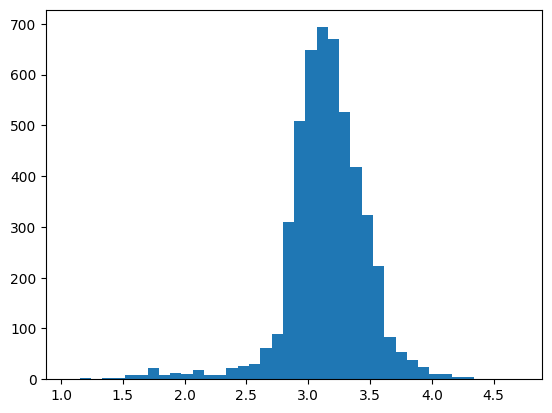

In [100]:
plt.hist(x['log chlorides'], bins=40)
plt.show()

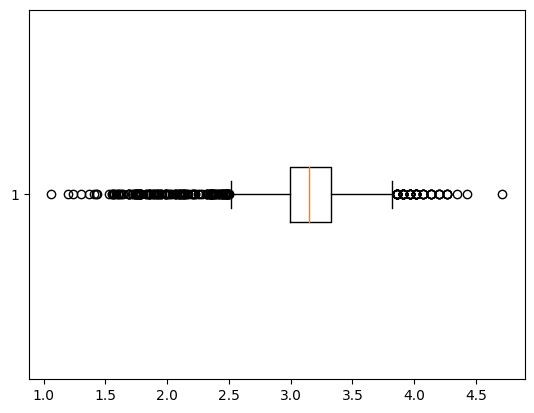

In [101]:
plt.boxplot(x['log chlorides'], vert=False)
plt.show()

Após verificar os gráficos após a transformação, podemos observar que a média está próxima da mediana. Vale ressaltar que, ao somar e subtrair o desvio padrão da média, obtemos valores próximos ao 1º e 3º quartis, indicando uma distribuição mais equilibrada dos dados.

### Dióxido de Enxofre Livre

In [44]:
x['free sulfur dioxide'].describe()

count   4898.0000
mean      35.3081
std       17.0071
min        2.0000
25%       23.0000
50%       34.0000
75%       46.0000
max      289.0000
Name: free sulfur dioxide, dtype: float64

In [45]:
# Moda da variável "free sulfur dioxide"
x['free sulfur dioxide'].mode()

0   29.0000
Name: free sulfur dioxide, dtype: float64

A média da quantidade de dióxido de enxofre livre é de aproximadamente 35.31, com um desvio padrão de 17.01. Isso indica que a maioria dos valores está no intervalo de aproximadamente 18.30 a 52.32.

Além disso, a média (35.31) é ligeiramente superior à mediana (34.00), sugerindo uma leve assimetria positiva nos dados. A presença de outliers é evidente, pois o valor máximo de 289.00 está bem distante do terceiro quartil (46.00).

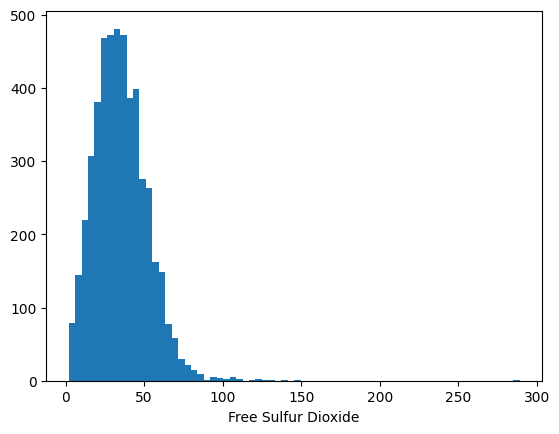

In [46]:
plt.hist(x['free sulfur dioxide'], bins=70)
plt.xlabel('Free Sulfur Dioxide')
plt.show()

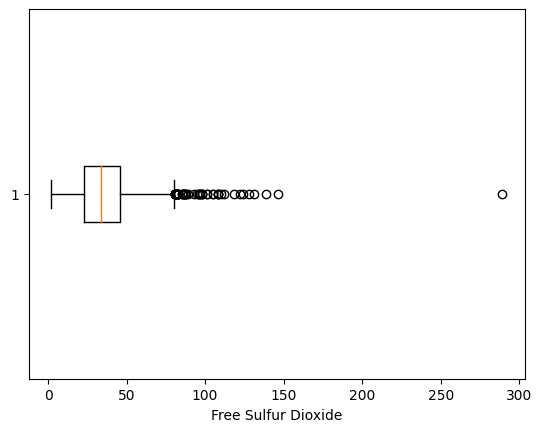

In [47]:
plt.boxplot(x['free sulfur dioxide'], vert=False)
plt.xlabel('Free Sulfur Dioxide')
plt.show()

Ao verificar o gráfico de histograma e boxplot, podemos ver que a afirma de assimetria possitiva é válida. Portanto, vamos propor alguma transformação para tentar diminuir essa assimetria, afim de melhorar a variabilidade dos dados.

Para melhorar a assimetria dos dados, vamos propor criar uma nova variavel, ela vai indicar a proporção de dióxido livre em relação ao total, mas antes disso vamos fazer uma análise da variavel de dióxido de enxofre total.

### Dióxido de Enxofre Total

In [48]:
x["total sulfur dioxide"].describe()

count   4898.0000
mean     138.3607
std       42.4981
min        9.0000
25%      108.0000
50%      134.0000
75%      167.0000
max      440.0000
Name: total sulfur dioxide, dtype: float64

In [49]:
x['total sulfur dioxide'].mode()

0   111.0000
Name: total sulfur dioxide, dtype: float64

A média de dióxido de enxofre total é de 138.36, com um desvio padrão de aproximadamente 42.50. Isso significa que a maioria dos vinhos possui entre 95.86 e 180.86 de dióxido de enxofre total.

Podemos observar possíveis outliers, dados os valores extremos: o mínimo de 9 é bastante distante do primeiro quartil (108), e o máximo de 440 é consideravelmente superior ao terceiro quartil (167).

Além disso, a média é ligeiramente maior que a mediana, indicando uma assimetria positiva nos dados. Essa assimetria sugere que há vinhos com níveis de dióxido de enxofre total significativamente acima da média, puxando a média para cima.

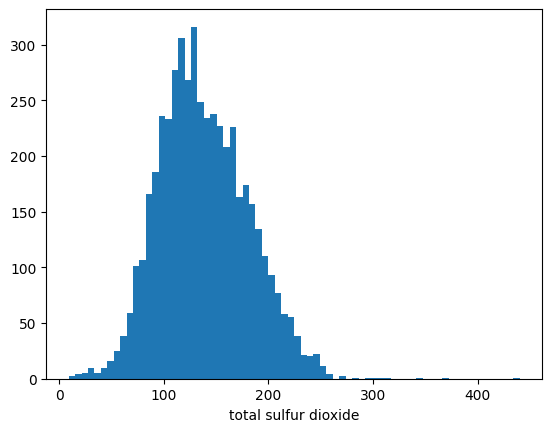

In [50]:
plt.hist(x['total sulfur dioxide'], bins=70)
plt.xlabel('total sulfur dioxide')
plt.show()

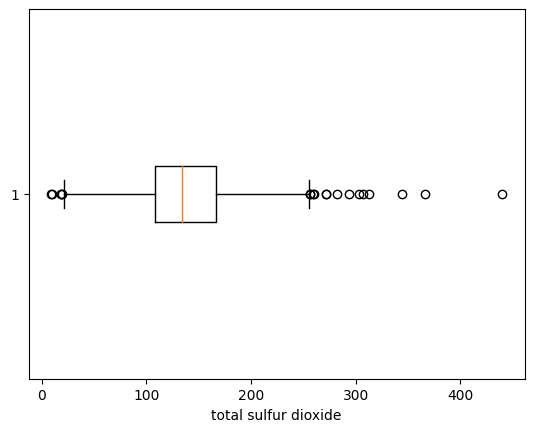

In [51]:
plt.boxplot(x['total sulfur dioxide'], vert=False)
plt.xlabel('total sulfur dioxide')
plt.show()

Ao plotar o histograma e o boxplot do dióxido total, observamos a presença de outliers tanto para valores pequenos quanto para valores grandes, além de uma assimetria positiva. Como mencionado anteriormente, planejamos combinar a variável de dióxido total com a variável de dióxido livre para aprimorar a qualidade da distribuição dos dados de ambas as variáveis

### Combinação Dióxido de Enxofre Livre e Total

Como vimos acima, as variáveis de dióxido possui alguns anomalias nas suas distribuição, contendo outliers que distorcem a sua distribuição. Afim de melhorar isso, foi proposto uma transformação para criar uma nova variável **(proportional free dioxide)**. Essa transformação consiste na seguinte combinação:

    x['proporcional_f_dioxido'] = np.sqrt(x['free sulfur dioxide']/x['total sulfur dioxide'])

In [52]:
x['proporcional_f_dioxido'] = np.sqrt(x['free sulfur dioxide']/x['total sulfur dioxide'])

In [53]:
x['proporcional_f_dioxido'].describe()

count   4898.0000
mean       0.4963
std        0.0963
min        0.1537
25%        0.4370
50%        0.5037
75%        0.5620
max        0.8429
Name: proporcional_f_dioxido, dtype: float64

In [54]:
x['proporcional_f_dioxido'].mode()

0   0.5000
Name: proporcional_f_dioxido, dtype: float64

Após a combinação das variáveis, observamos suas novas medidas, com uma nova média de aproximadamente 0.5 e um desvio padrão de 0.096. Isso indica que a maioria dos vinhos tem uma proporção de dióxido livre, após ser submetida à raiz cúbica, entre 0.404 e 0.596.

Também notamos que o valor mínimo de 0.1537 e o máximo de 0.8429 estão bastante distantes do primeiro quartil (0.437) e do terceiro quartil (0.5620), respectivamente. Isso sugere que a transformação não foi capaz de lidar completamente com os outliers. No entanto, é importante ressaltar que a média, mediana e moda estão quase exatamente em 0.5, indicando um ajuste para uma melhor simetria dos dados.

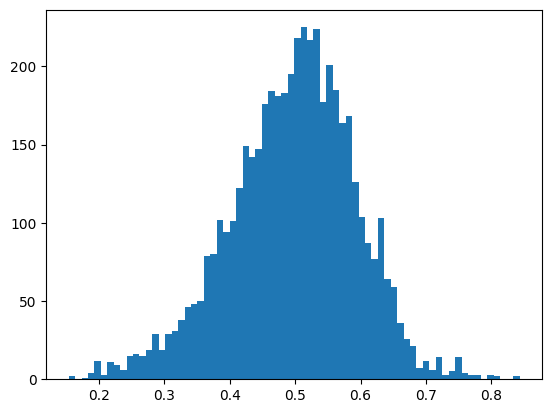

In [55]:
plt.hist(x['proporcional_f_dioxido'], bins=70)
plt.show()

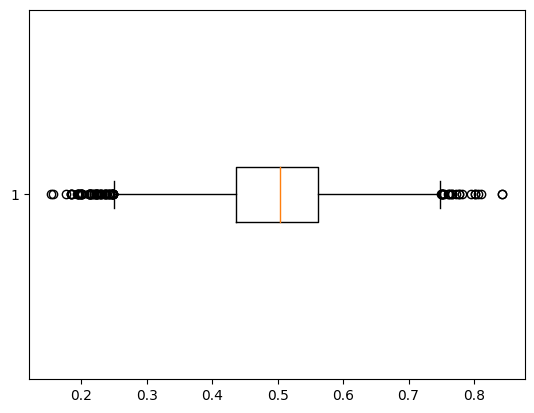

In [56]:
plt.boxplot(x['proporcional_f_dioxido'], vert=False)
plt.show()

Podemos verificar tanto no boxplot quanto no histograma, que a afirmação dos outliers e simetria nos dados se concretizam.